In [1]:
import imgaug as ia
import numpy as np
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
data = pd.read_csv('data_2.csv')
data.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,bbox_x3,bbox_y3,bbox_x4,bbox_y4,labels,fname,img_type
0,47,239,1280,273,1280,418,38,377,1,img00.jpg,1
1,37,400,1280,428,1280,882,26,872,2,img00.jpg,1
2,353,109,3465,141,3489,481,345,481,1,img01.jpg,1
3,329,533,3493,521,3569,1633,317,1781,2,img01.jpg,1
4,121,673,3869,633,3909,1057,105,1117,1,img02.jpg,1


In [7]:
for f in data.fname.unique():
    img = cv2.imread('data_2/'+f)
    seg = cv2.imread('annotations_2/'+f.split('.')[0]+'.png')
    img_r = cv2.resize(img, (480,320))
    seg_r = cv2.resize(seg, (480,320))
    cv2.imwrite('images_train_2/'+f.split('.')[0]+'.png',img_r)
    cv2.imwrite('annotations_train_2/'+f.split('.')[0]+'.png',seg_r)

In [8]:
def augment_seg(img,seg,seq):
    aug_det = seq.to_deterministic()
    image_aug = aug_det.augment_image(img)
    segmap = ia.SegmentationMapOnImage(seg, nb_classes=np.max(seg)+1, shape=img.shape)
    segmap_aug = aug_det.augment_segmentation_maps(segmap)
    segmap_aug = segmap_aug.get_arr_int()
    return image_aug, segmap_aug

In [9]:
def augmentation_images(images,annotations):
    """
    images = glob.glob('images_train_2/*.png')
    annotations = glob.glob('annotations_train_2/*.png')
    """
    
    img_path = images[0].split('/')[0]
    annot_path = annotations[0].split('/')[0]
    for i,s in zip(images,annotations):
    
        fname = i.split('/')[-1].split('.')[0]
        img = cv2.imread(i)
        seg = cv2.imread(s)

        for n in range(20):

            # crop augmentation
            bnds = np.random.randint(5,40,4)
            seq_crop = iaa.Sequential([iaa.Crop(px=tuple(bnds))])
            img_aug, seg_aug = augment_seg(img,seg,seq_crop)
            cv2.imwrite( img_path + '/'+fname+'_crop'+str(n)+'.png',img_aug)
            cv2.imwrite(annot_path+'/'+fname+'_crop'+str(n)+'.png',seg_aug)

            # rotate augmentation
            seq_rotate = iaa.Sequential([iaa.Affine(rotate=(-10,10))])
            img_aug, seg_aug = augment_seg(img,seg,seq_rotate)
            cv2.imwrite(img_path+'/'+fname+'_rotate'+str(n)+'.png',img_aug)
            cv2.imwrite(annot_path+'/'+fname+'_rotate'+str(n)+'.png',seg_aug)

            # scale augmentation
            seq_scale = iaa.Sequential([iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})])
            img_aug, seg_aug = augment_seg(img,seg,seq_scale)
            cv2.imwrite(img_path+'/'+fname+'_scale'+str(n)+'.png',img_aug)
            cv2.imwrite(annot_path+'/'+fname+'_scale'+str(n)+'.png',seg_aug)

            # blur augmentation
            seq_blur = iaa.Sequential([iaa.GaussianBlur(sigma=(0, 3.0))])
            img_aug, seg_aug = augment_seg(img,seg,seq_blur)
            cv2.imwrite(img_path+'/'+fname+'_blur'+str(n)+'.png',img_aug)
            cv2.imwrite(annot_path+'/'+fname+'_blur'+str(n)+'.png',seg_aug)

In [10]:
images = glob.glob('images_train_2/*.png')
annotations = glob.glob('annotations_train_2/*.png')

In [11]:
for i,s in zip(images,annotations):
    
    fname = i.split('/')[-1].split('.')[0]
    img = cv2.imread(i)
    seg = cv2.imread(s)
    
    for n in range(10):
    
        # crop augmentation
        bnds = np.random.randint(5,40,4)
        seq_crop = iaa.Sequential([iaa.Crop(px=tuple(bnds))])
        img_aug, seg_aug = augment_seg(img,seg,seq_crop)
        cv2.imwrite('images_train_2/'+fname+'_crop'+str(n)+'.png',img_aug)
        cv2.imwrite('annotations_train_2/'+fname+'_crop'+str(n)+'.png',seg_aug)

        # rotate augmentation
        seq_rotate = iaa.Sequential([iaa.Affine(rotate=(-10,10))])
        img_aug, seg_aug = augment_seg(img,seg,seq_rotate)
        cv2.imwrite('images_train_2/'+fname+'_rotate'+str(n)+'.png',img_aug)
        cv2.imwrite('annotations_train_2/'+fname+'_rotate'+str(n)+'.png',seg_aug)

        # scale augmentation
        seq_scale = iaa.Sequential([iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})])
        img_aug, seg_aug = augment_seg(img,seg,seq_scale)
        cv2.imwrite('images_train_2/'+fname+'_scale'+str(n)+'.png',img_aug)
        cv2.imwrite('annotations_train_2/'+fname+'_scale'+str(n)+'.png',seg_aug)

        # blur augmentation
        seq_blur = iaa.Sequential([iaa.GaussianBlur(sigma=(0, 3.0))])
        img_aug, seg_aug = augment_seg(img,seg,seq_blur)
        cv2.imwrite('images_train_2/'+fname+'_blur'+str(n)+'.png',img_aug)
        cv2.imwrite('annotations_train_2/'+fname+'_blur'+str(n)+'.png',seg_aug)

/home/vasylcf/anaconda3/lib/python3.7/site-packages/imgaug/imgaug.py:182: DeprecationWarning: Function `SegmentationMapOnImage()` is deprecated. Use `SegmentationMapsOnImage` instead. (Note the plural 'Maps' instead of old 'Map'.).
  warn_deprecated(msg, stacklevel=3)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/imgaug/imgaug.py:107: DeprecationWarning: Providing nb_classes to SegmentationMapsOnImage is no longer necessary and hence deprecated. The argument is ignored and can be safely removed.
  warn(msg, category=DeprecationWarning, stacklevel=stacklevel)
/home/vasylcf/anaconda3/lib/python3.7/site-packages/imgaug/imgaug.py:182: DeprecationWarning: Method `SegmentationMapsOnImage.get_arr_int()` is deprecated. Use `SegmentationMapsOnImage.get_arr()` instead.
  warn_deprecated(msg, stacklevel=3)


In [8]:
1*4*10*10

400

## Model

In [5]:
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.models.model_utils import transfer_weights

Using TensorFlow backend.
/home/vasylcf/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vasylcf/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vasylcf/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vasylcf/anaconda3/lib/python3.7/site-packages/t

In [14]:
data['labels'].unique()

array([1, 2, 3])

In [7]:
model = vgg_unet(n_classes= data['labels'].unique().shape[0]+1,  input_height=320, input_width=480 )

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.train(
    train_images =  "images_train_2/",
    train_annotations = "annotations_train_2/",
    validate = True,
    val_images = "validation/",
    val_annotations = "annotation_validation/",
    epochs=5
)

  6%|▌         | 20/328 [00:00<00:01, 197.02it/s]

Verifying training dataset


 24%|██▍       | 20/82 [00:00<00:00, 199.36it/s]

Dataset verified! 
Verifying validation dataset


100%|██████████| 82/82 [00:00<00:00, 198.12it/s]


Dataset verified! 
Starting Epoch  0
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/1
512/512 [==============================] - 286s 559ms/step - loss: 0.3972 - accuracy: 0.8629 - val_loss: 0.8459 - val_accuracy: 0.7464
Finished Epoch 0
Starting Epoch  1
Epoch 1/1
512/512 [==============================] - 276s 538ms/step - loss: 0.1733 - accuracy: 0.9415 - val_loss: 0.6718 - val_accuracy: 0.7836
Finished Epoch 1
Starting Epoch  2
Epoch 1/1
512/512 [==============================] - 272s 532ms/step - loss: 0.0851 - accuracy: 0.9722 - val_loss: 1.5071 - val_accuracy: 0.6778
Finished Epoch 2
Starting Epoch  3
Epoch 1/1
512/512 [==============================] - 272s 532ms/step - loss: 0.0580 - accuracy: 0.9826 - val_loss: 0.8627 - val_accuracy: 0.7903
Finished Epoch 3
Starting Epoch  4
Epoch 1/1
512/512 [==============================] - 273s 533ms/step - loss: 0.0372 - accuracy: 0.9894 - val_loss: 1.

In [20]:
model.save('segmentation_3_classes.h5')

In [8]:
model.load_weights('segmentation_3_classes.h5')

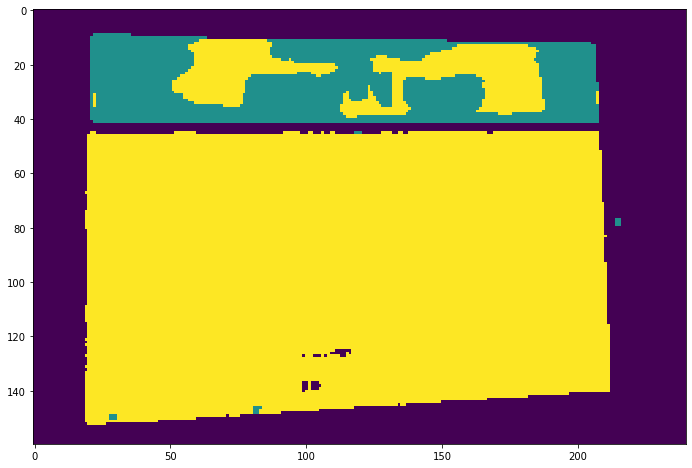

In [9]:
out = model.predict_segmentation(
    inp="images_train_2/img01.png",
    out_fname="out.png"
)
plt.figure(figsize=(12,8))
plt.imshow(out)

In [10]:
out.shape

(160, 240)

In [22]:
#labels on image
np.unique(out[out>0])

array([1, 2])

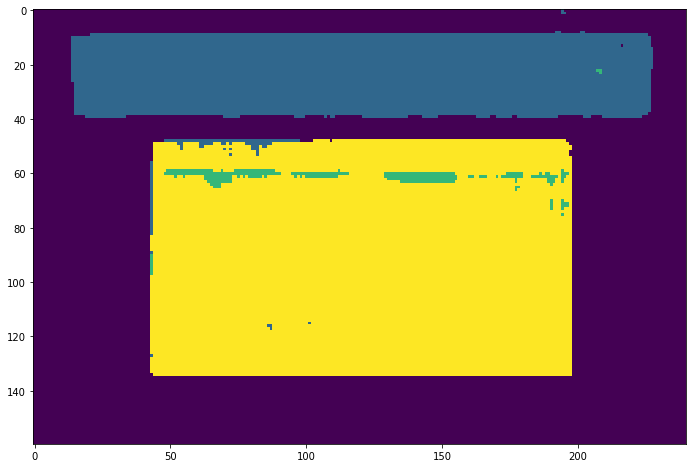

In [52]:
out = model.predict_segmentation(
    inp="images_train_2/img05.png",
    out_fname="out_2.png"
)
plt.figure(figsize=(12,8))
plt.imshow(out)

In [53]:
out.shape

(160, 240)

In [65]:
temp = out*10

In [54]:
np.unique(out)

array([0, 1, 2, 3])

In [75]:
cnts, _ = cv2.findContours(temp, cv2.RETR_FLOODFILL,cv2.CHAIN_APPROX_SIMPLE)

In [71]:
len(cnts)

51

In [76]:
cnts = sorted(cnts, key=lambda x: cv2.contourArea(x), reverse=True)

In [80]:
[cv2.contourArea(i) for i in cnts[:10]]

[13699.5, 13097.0, 6716.0, 6236.0, 167.0, 127.0, 77.0, 71.0, 57.0, 31.0]

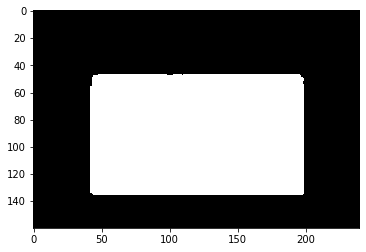

In [94]:
img=cv2.imread("images_train_2/img05.png")
img= cv2.resize(img, (240,160))

mask = np.zeros(img.shape)
pts= cnts[0]
mask = cv2.fillPoly(mask,[pts],color=(1,1,1))
plt.imshow(mask)

In [98]:
rects=[]
for c in cnts[:10]:
    x,y,w,h = cv2.boundingRect(c)
    rects.append([x,y,w,h])
rects_ed, weights = cv2.groupRectangles(rects,1,0.2)

In [99]:
len(rects)

10

In [100]:
len(rects_ed)

2

In [102]:
rects_ed[0]

array([ 42,  48, 156,  88], dtype=int32)

In [110]:
def draw_rect(cnt):
    return (cnt[0],cnt[1]),(cnt[0]+cnt[2],cnt[1]+cnt[3]),(255,255,0),5

In [112]:
draw_rect(rects_ed[0])

SyntaxError: can't use starred expression here (<ipython-input-112-b24da7348eab>, line 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


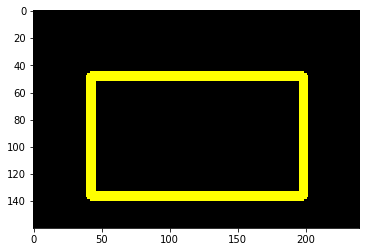

In [113]:
mask = np.zeros(img.shape)
cv2.rectangle(mask,*draw_rect(rects_ed[0]))
plt.imshow(mask)              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


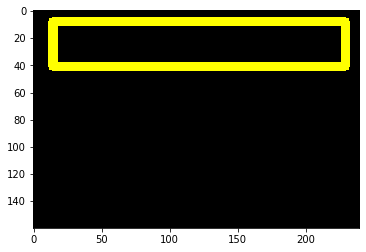

In [114]:
mask = np.zeros(img.shape)
cv2.rectangle(mask,*draw_rect(rects_ed[1]))
plt.imshow(mask) 

In [32]:
img=cv2.imread('test.jpg')
img= cv2.resize(img, (480,320))

In [33]:
img.shape

(320, 480, 3)

In [41]:
 a = img.reshape(1,320,480,3)

In [42]:
pr = model.predict(a)

In [44]:
pr = pr[0]
pr.shape

(38400, 4)

In [45]:
for c in [1,2,3]:
    

1
2
3


In [51]:
m=np.array([[4,2,3],[1,5,6]])
np.where(m>3,m,m*10)

array([[ 4, 20, 30],
       [10,  5,  6]])

In [13]:
# find coordinats of mask
np.where(out ==1 )

(array([  0,   1,   1, ..., 116, 117, 127]),
 array([194, 194, 195, ...,  87,  87,  43]))

In [24]:
#labels on image
np.unique(out[out>0])

array([1, 2, 3])

In [25]:
np.histogram(out[out>0],bins=[0,1,2,3,4])

(array([    0,  6595,   334, 13010]), array([0, 1, 2, 3, 4]))

In [26]:
#test image
img=cv2.imread('test.jpg')
img_r = cv2.resize(img, (480,300))
cv2.imwrite('test_resize.png',img_r)

True

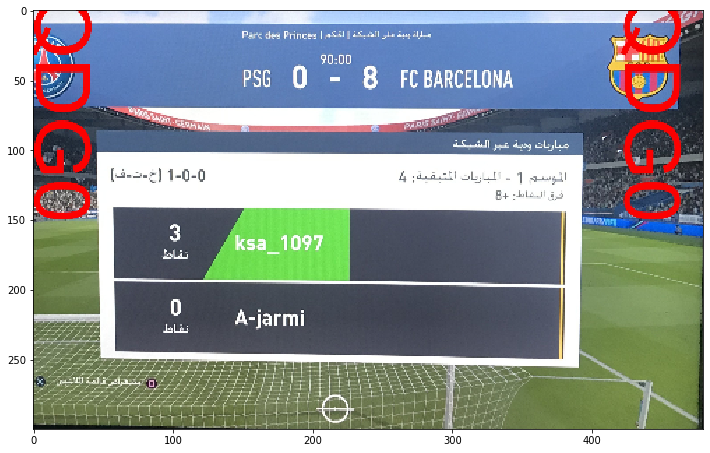

In [27]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

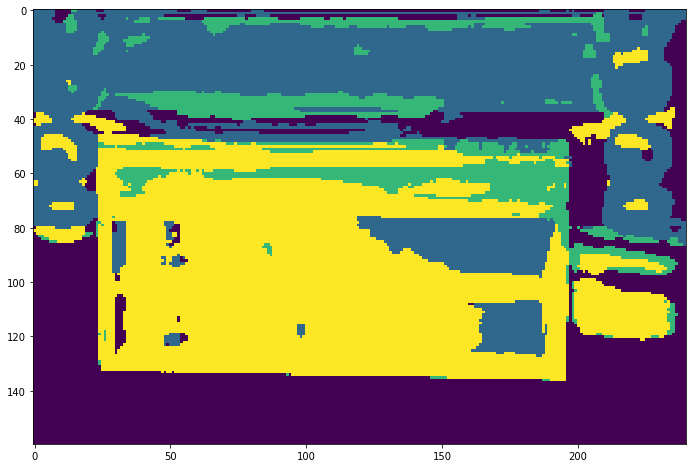

In [28]:
# 5 epochs
out = model.predict_segmentation(
    inp="test_resize.png",
    out_fname="out_test_2.png"
)
plt.figure(figsize=(12,8))
plt.imshow(out)

In [29]:
np.histogram(out[out>0],bins=[0,1,2,3,4])

(array([    0, 11302,  3587, 12624]), array([0, 1, 2, 3, 4]))

In [30]:
#test image
img=cv2.imread('test_2.jpg')
img_r = cv2.resize(img, (480,300))
cv2.imwrite('test_2_resize.png',img_r)

True

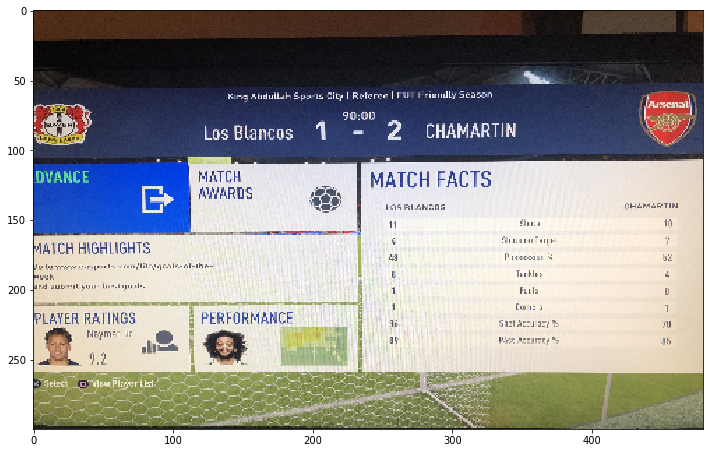

In [31]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

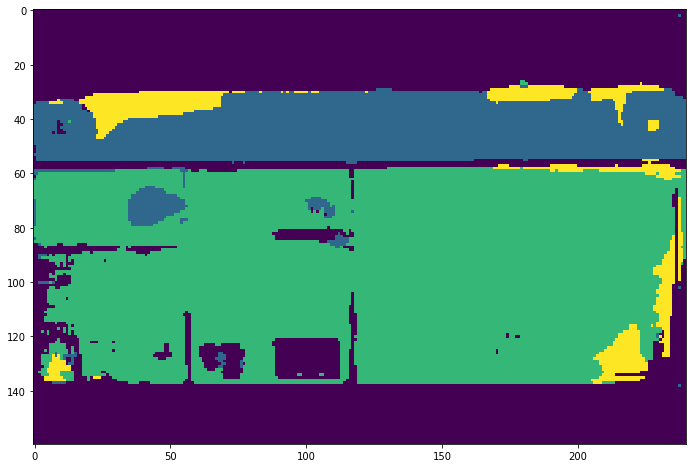

In [32]:
out = model.predict_segmentation(
    inp="test_2_resize.png",
    out_fname="out_test_3.png"
)
plt.figure(figsize=(12,8))
plt.imshow(out)

In [33]:
np.histogram(out[out>0],bins=[1,2,3,4])

(array([ 5773, 16200,  1513]), array([1, 2, 3, 4]))